In [1]:
## Setting
!pip3 install pandas
!pip3 install xlrd
!pip3 install nltk

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Nanum Gothic')
mpl.rcParams['axes.unicode_minus'] = False


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
## Combine sample
xls_dir = './말뭉치/말뭉치_자기소개/'

df_data_org = pd.DataFrame()

for filename in os.listdir(xls_dir):
    file_path = os.path.join(xls_dir, filename)
    ### keep_default_na=False - 형태 주석 'NA'와 null 값 구분
    xls_data = pd.read_excel(file_path, keep_default_na=False)
    ### Combine DataFrame
    df_data_org = pd.concat([df_data_org, xls_data])

## DataFrame to CSV
# combined_csv_file = './말뭉치_자기소개.csv'
# df_data.to_csv(combined_csv_file, index=False)

df_data_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74913 entries, 0 to 1511
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   표본 번호        74913 non-null  int64 
 1   문장           74913 non-null  object
 2   어절 번호        74913 non-null  int64 
 3   원 어절         74913 non-null  object
 4   형태 번호        74913 non-null  int64 
 5   원 형태소        74913 non-null  object
 6   형태 주석        74913 non-null  object
 7   Unnamed: 7   57286 non-null  object
 8   Unnamed: 8   57286 non-null  object
 9   Unnamed: 9   57286 non-null  object
 10  Unnamed: 10  57286 non-null  object
 11  Unnamed: 11  57286 non-null  object
 12  Unnamed: 12  57286 non-null  object
 13  교정 형태소       17627 non-null  object
 14  교정 주석        17627 non-null  object
 15  분석 불가능       17627 non-null  object
 16  오류 위치        17627 non-null  object
 17  오류 양상        17627 non-null  object
 18  오류 층위        17627 non-null  object
dtypes: int64(3), object(16)
memory 

In [3]:
## 불필요한 Column 삭제
df_data_org['Unnamed: 7'].unique()
### >>> array(['', nan], dtype=object)
### Unnamed == 불필요한 컬럼
# print(df_data['Unnamed: 7'].count())
# print(df_data.loc[df_data['Unnamed: 7'] == '']['Unnamed: 7'].count())
# print(df_data.loc[df_data['Unnamed: 7'] != '']['Unnamed: 7'].count())
### >>> 57286
### >>> 57286
### >>> 0

## 불필요한 Column drop
df_data = df_data_org
for i in range(7,13):
    df_data = df_data.drop(['Unnamed: '+str(i)],axis=1)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74913 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   74913 non-null  int64 
 1   문장      74913 non-null  object
 2   어절 번호   74913 non-null  int64 
 3   원 어절    74913 non-null  object
 4   형태 번호   74913 non-null  int64 
 5   원 형태소   74913 non-null  object
 6   형태 주석   74913 non-null  object
 7   교정 형태소  17627 non-null  object
 8   교정 주석   17627 non-null  object
 9   분석 불가능  17627 non-null  object
 10  오류 위치   17627 non-null  object
 11  오류 양상   17627 non-null  object
 12  오류 층위   17627 non-null  object
dtypes: int64(3), object(10)
memory usage: 8.0+ MB


In [4]:
## 형태 주석 'NA'와 null 구분
df_data.head()
# df_data['형태 주석'].unique()
### >>>  array(['NP', 'NNG', 'XSA', 'EP', 'EF', 'JX', 'NNP', 'JKB', 'XSV', 'EC',
###       'VX', 'ETM', 'XSN', 'VCP', 'VV', 'VA', 'JKS', 'MAG', 'XR', 'JC',
###       'NA', 'VCN', 'MM', 'ETN', 'MAJ', 'JKG', 'JKC', 'IC', 'NNB', 'NR',
###       'JKO', '', 'SF', 'XPN', 'JKQ', 'SYMBOL', 'SS', 'SL', 'SN', 'NONE'],
###      dtype=object)
# df_data['오류 층위'].unique()
### >>> array([nan, '', 'PS', 'PP', 'PP;PS', 'PC;PP', 'PC', '중간 발음(변이음 포함)',
###       'POS', '원어식 발음', 'PP;중간 발음(변이음 포함)', 'ST', 'MCJ;PP', 'WO', 'MCJ',
###       'MDV;POS', 'SH', 'MDC'], dtype=object)

## 전체 null 값 처리
print(">>> null 처리 전\n", df_data.isnull().sum())

### 'NONE' to None
df_data = df_data.replace('NONE', None)
### '' to None
df_data = df_data.replace('', None)
### NaN to None
df_data = df_data.where(pd.notnull(df_data), None)

print("\n>>> null 처리 후\n", df_data.isnull().sum())

df_data.head()

>>> null 처리 전
 표본 번호         0
문장            0
어절 번호         0
원 어절          0
형태 번호         0
원 형태소         0
형태 주석         0
교정 형태소    57286
교정 주석     57286
분석 불가능    57286
오류 위치     57286
오류 양상     57286
오류 층위     57286
dtype: int64

>>> null 처리 후
 표본 번호         0
문장            0
어절 번호         0
원 어절          0
형태 번호         0
원 형태소       328
형태 주석       332
교정 형태소    71279
교정 주석     71279
분석 불가능    74877
오류 위치     72734
오류 양상     74794
오류 층위     73693
dtype: int64


,표본 번호,문장,어절 번호,원 어절,형태 번호,원 형태소,형태 주석,교정 형태소,교정 주석,분석 불가능,오류 위치,오류 양상,오류 층위
0,32643,여러분 안녕하쎄요,1,여러분,1,여러분,NP,None,None,None,None,None,None
1,32643,여러분 안녕하쎄요,2,안녕하쎄요,2,안녕,NNG,None,None,None,None,None,None
2,32643,여러분 안녕하쎄요,2,안녕하쎄요,3,하,XSA,None,None,None,None,None,None
3,32643,여러분 안녕하쎄요,2,안녕하쎄요,4,씨,EP,None,None,None,None,None,None
4,32643,여러분 안녕하쎄요,2,안녕하쎄요,5,어요,EF,None,None,None,None,None,None


In [5]:
## 품사표를 이용한 기호 제거
# print(df_data['형태 주석'].unique())
### >>> ['NP' 'NNG' 'XSA' 'EP' 'EF' 'JX' 'NNP' 'JKB' 'XSV' 'EC' 'VX' 'ETM' 'XSN'
### 'VCP' 'VV' 'VA' 'JKS' 'MAG' 'XR' 'JC' 'NA' 'VCN' 'MM' 'ETN' 'MAJ' 'JKG'
### 'JKC' 'IC' 'NNB' 'NR' 'JKO' None 'SF' 'XPN' 'JKQ' 'SYMBOL' 'SS' 'SL' 'SN']

posSymbol = {
    "SF": "마침표,물음표,느낌표",
    "SP": "쉼표,가운뎃점,콜론,빗금",
    "SS": "따옴표,괄호표,줄표",
    "SE": "줄임표",
    "SO": "붙임표(물결,숨김,빠짐)",
    "SL": "외국어",
    "SH": "한자",
    "SW": "기타기호(논리수학기호,화폐기호)",
    "NF": "명사추정범주",
    "NV": "용언추정범주",
    "SN": "숫자",
    # "NA": "분석불능범주"
    "SYMBOL": "SYMBOL"
}

for key, value in posSymbol.items():
    ### 기호 품사표 원 형태소 확인
    # print("\n", value, "\n", df_data.loc[df_data['형태 주석'] == key]['원 형태소'])
    ### 기호 품사 제거
    df_data = df_data[df_data["형태 주석"] != key]

df_data.info()
print(df_data['형태 주석'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 74713 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   74713 non-null  int64 
 1   문장      74713 non-null  object
 2   어절 번호   74713 non-null  int64 
 3   원 어절    74713 non-null  object
 4   형태 번호   74713 non-null  int64 
 5   원 형태소   74385 non-null  object
 6   형태 주석   74381 non-null  object
 7   교정 형태소  3631 non-null   object
 8   교정 주석   3631 non-null   object
 9   분석 불가능  36 non-null     object
 10  오류 위치   2179 non-null   object
 11  오류 양상   119 non-null    object
 12  오류 층위   1220 non-null   object
dtypes: int64(3), object(10)
memory usage: 8.0+ MB
['NP' 'NNG' 'XSA' 'EP' 'EF' 'JX' 'NNP' 'JKB' 'XSV' 'EC' 'VX' 'ETM' 'XSN'
 'VCP' 'VV' 'VA' 'JKS' 'MAG' 'XR' 'JC' 'NA' 'VCN' 'MM' 'ETN' 'MAJ' 'JKG'
 'JKC' 'IC' 'NNB' 'NR' 'JKO' None 'XPN' 'JKQ']


In [6]:
## 한국어 불용어(Stopwords) 제거
### https://t1.daumcdn.net/cfile/tistory/241D6F475873C2B101
### 형태, 품사, 비율 -> 형태와 품사만 사용

## stopwords 리스트 생성
txt_tmp = open("./koreanStopwords.txt", 'r', encoding="utf-8")

stopwords = []
while True:
    line = txt_tmp.readline()
    if not line: break
    form, pos, _ = line.split()
    stopwords.append([form, pos])

txt_tmp.close()

## stopwords 제거
# print(df_data[((df_data["원 형태소"] == form) & (df_data["형태 주석"] == pos))])
for f, p in stopwords:
    df_data = df_data[~((df_data["원 형태소"] == f) & (df_data["형태 주석"] == p))]

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62835 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   표본 번호   62835 non-null  int64 
 1   문장      62835 non-null  object
 2   어절 번호   62835 non-null  int64 
 3   원 어절    62835 non-null  object
 4   형태 번호   62835 non-null  int64 
 5   원 형태소   62507 non-null  object
 6   형태 주석   62503 non-null  object
 7   교정 형태소  3287 non-null   object
 8   교정 주석   3287 non-null   object
 9   분석 불가능  33 non-null     object
 10  오류 위치   2059 non-null   object
 11  오류 양상   101 non-null    object
 12  오류 층위   1197 non-null   object
dtypes: int64(3), object(10)
memory usage: 6.7+ MB


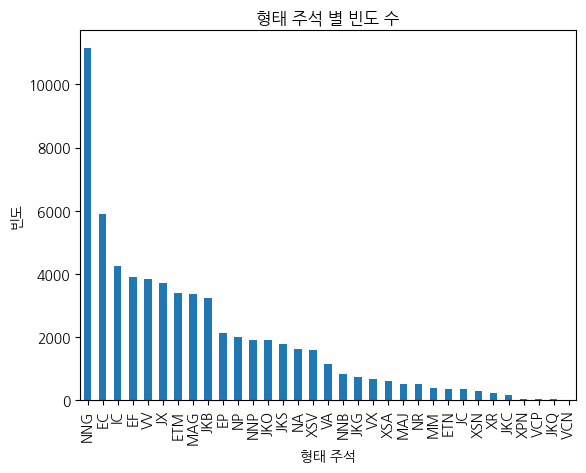

In [7]:
## 데이터 분석 - EDA

### 데이터프레임의 각 열의 데이터 타입 확인
# print(df_data.dtypes)

### null 데이터 확인
# print(df_data.isnull().sum())

### '형태 주석' 빈도
pos_freq = df_data['형태 주석'].value_counts()
pos_freq.plot(kind='bar')
plt.title('형태 주석 별 빈도 수')
plt.xlabl('형태 주석')
plt.ylabel('빈도')
plt.show()
